##### import library

In [1]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# 3D plotting
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Deep learning (PyTorch and TensorFlow)
import torch
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2

# Plotly for interactive visualization
import plotly.graph_objects as go

# Custom utility module
import utility


2025-03-05 17:19:42.306544: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-05 17:19:43.948542: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-05 17:19:43.948720: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-05 17:19:44.096119: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-05 17:19:44.506245: I tensorflow/core/platform/cpu_feature_guar

##### Define functions 

In [2]:
def parabolic_loss_with_dips_3D(args):
    x, y = args
    base_parabola = x**2 + y**2
    
    dips = sum(
        10 * np.exp(-5 * ((x - i) ** 2 + (y - j) ** 2))
        for i in list(range(-5, -2)) + list(range(3, 6))  
        for j in list(range(-5, -2)) + list(range(3, 6))   
    )
    
    return base_parabola - dips


f = parabolic_loss_with_dips_3D


##### Define the function in PyTorch


In [3]:
def parabolic_loss_with_dips_3D_torch(args):
    x, y = args
    base_parabola = x**2 + y**2

    dips = sum(
        10 * torch.exp(-5 * ((x - i) ** 2 + (y - j) ** 2))
        for i in list(range(-5, -2)) + list(range(3, 6))  
        for j in list(range(-5, -2)) + list(range(3, 6))   
    )

    return base_parabola - dips


##### Plot graph

In [4]:
def plot_graph(fig, x, y, z):

    # 3D Surface Plot
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    surf = ax1.plot_surface(x, y, z, cmap=cmap, edgecolor="none")
    ax1.set_title("3D Surface Plot", fontsize=10)
    ax1.set_xlabel("X-axis", fontsize=10)
    ax1.set_ylabel("Y-axis", fontsize=10)
    # ax1.set_zlabel("Function Value", fontsize=5)

    # Add colorbar for 3D plot
    cbar1 = fig.colorbar(surf, ax=ax1, fraction=0.046, pad=0.04)
    cbar1.set_label("Function Value", fontsize=10)

    # 2D Contour Plot
    ax2 = fig.add_subplot(1, 2, 2)
    contour = ax2.contourf(x, y, z, levels=50, cmap=cmap)
    ax2.set_xlabel("X-axis", fontsize=10)
    ax2.set_ylabel("Y-axis", fontsize=10)
    ax2.set_title("2D Contour Plot", fontsize=10)

    # Add colorbar for 2D plot without overlapping
    cbar2 = fig.colorbar(contour, ax=ax2, fraction=0.046, pad=0.04)
    cbar2.set_label("Function Value", fontsize=10)

    ax1.tick_params(axis='x', labelsize=10, rotation=0)
    ax1.tick_params(axis='y', labelsize=10)
    ax1.tick_params(axis='both', which='both', width=0.5)

    # Improve layout to avoid overlap
    plt.tight_layout()
    # plt.show()

    return fig, ax1, ax2



##### Initialize class object and grid

In [5]:
obj = utility.CentralDifference()
# Create a grid of x and y values
interval = 1000
max_iters = 1000
min_grid = -5
max_grid = 5
x = np.linspace(min_grid, max_grid, interval)
y = np.linspace(min_grid, max_grid, interval)
x, y = np.meshgrid(x, y)
z = f((x, y))

##### Define colormap

In [6]:
colors = [
    (0.0, "navy"),         # Deep blue for the minimum
    (0.01, "blue"),         # Blue
    (0.2, "cyan"),         # Cyan
    (0.4, "limegreen"),    # Green
    (0.6, "yellow"),       # Yellow
    (0.8, "orange"),       # Orange
    (1.0, "darkred"),      # Deep red for the maximum
]
cmap = LinearSegmentedColormap.from_list("improved_gradient_cmap", colors)

# obj.show_2D_surface_plot(x, y, z,  title = "Custom function", cmap = cmap)

##### Show 3D visualization and contourplot

In [68]:
# fig = plt.figure(figsize=(12, 6), dpi=300)
# fig, ax1, ax2 = plot_graph(fig, x, y, z)
# # plt.savefig("sample3.pdf", dpi = 300)

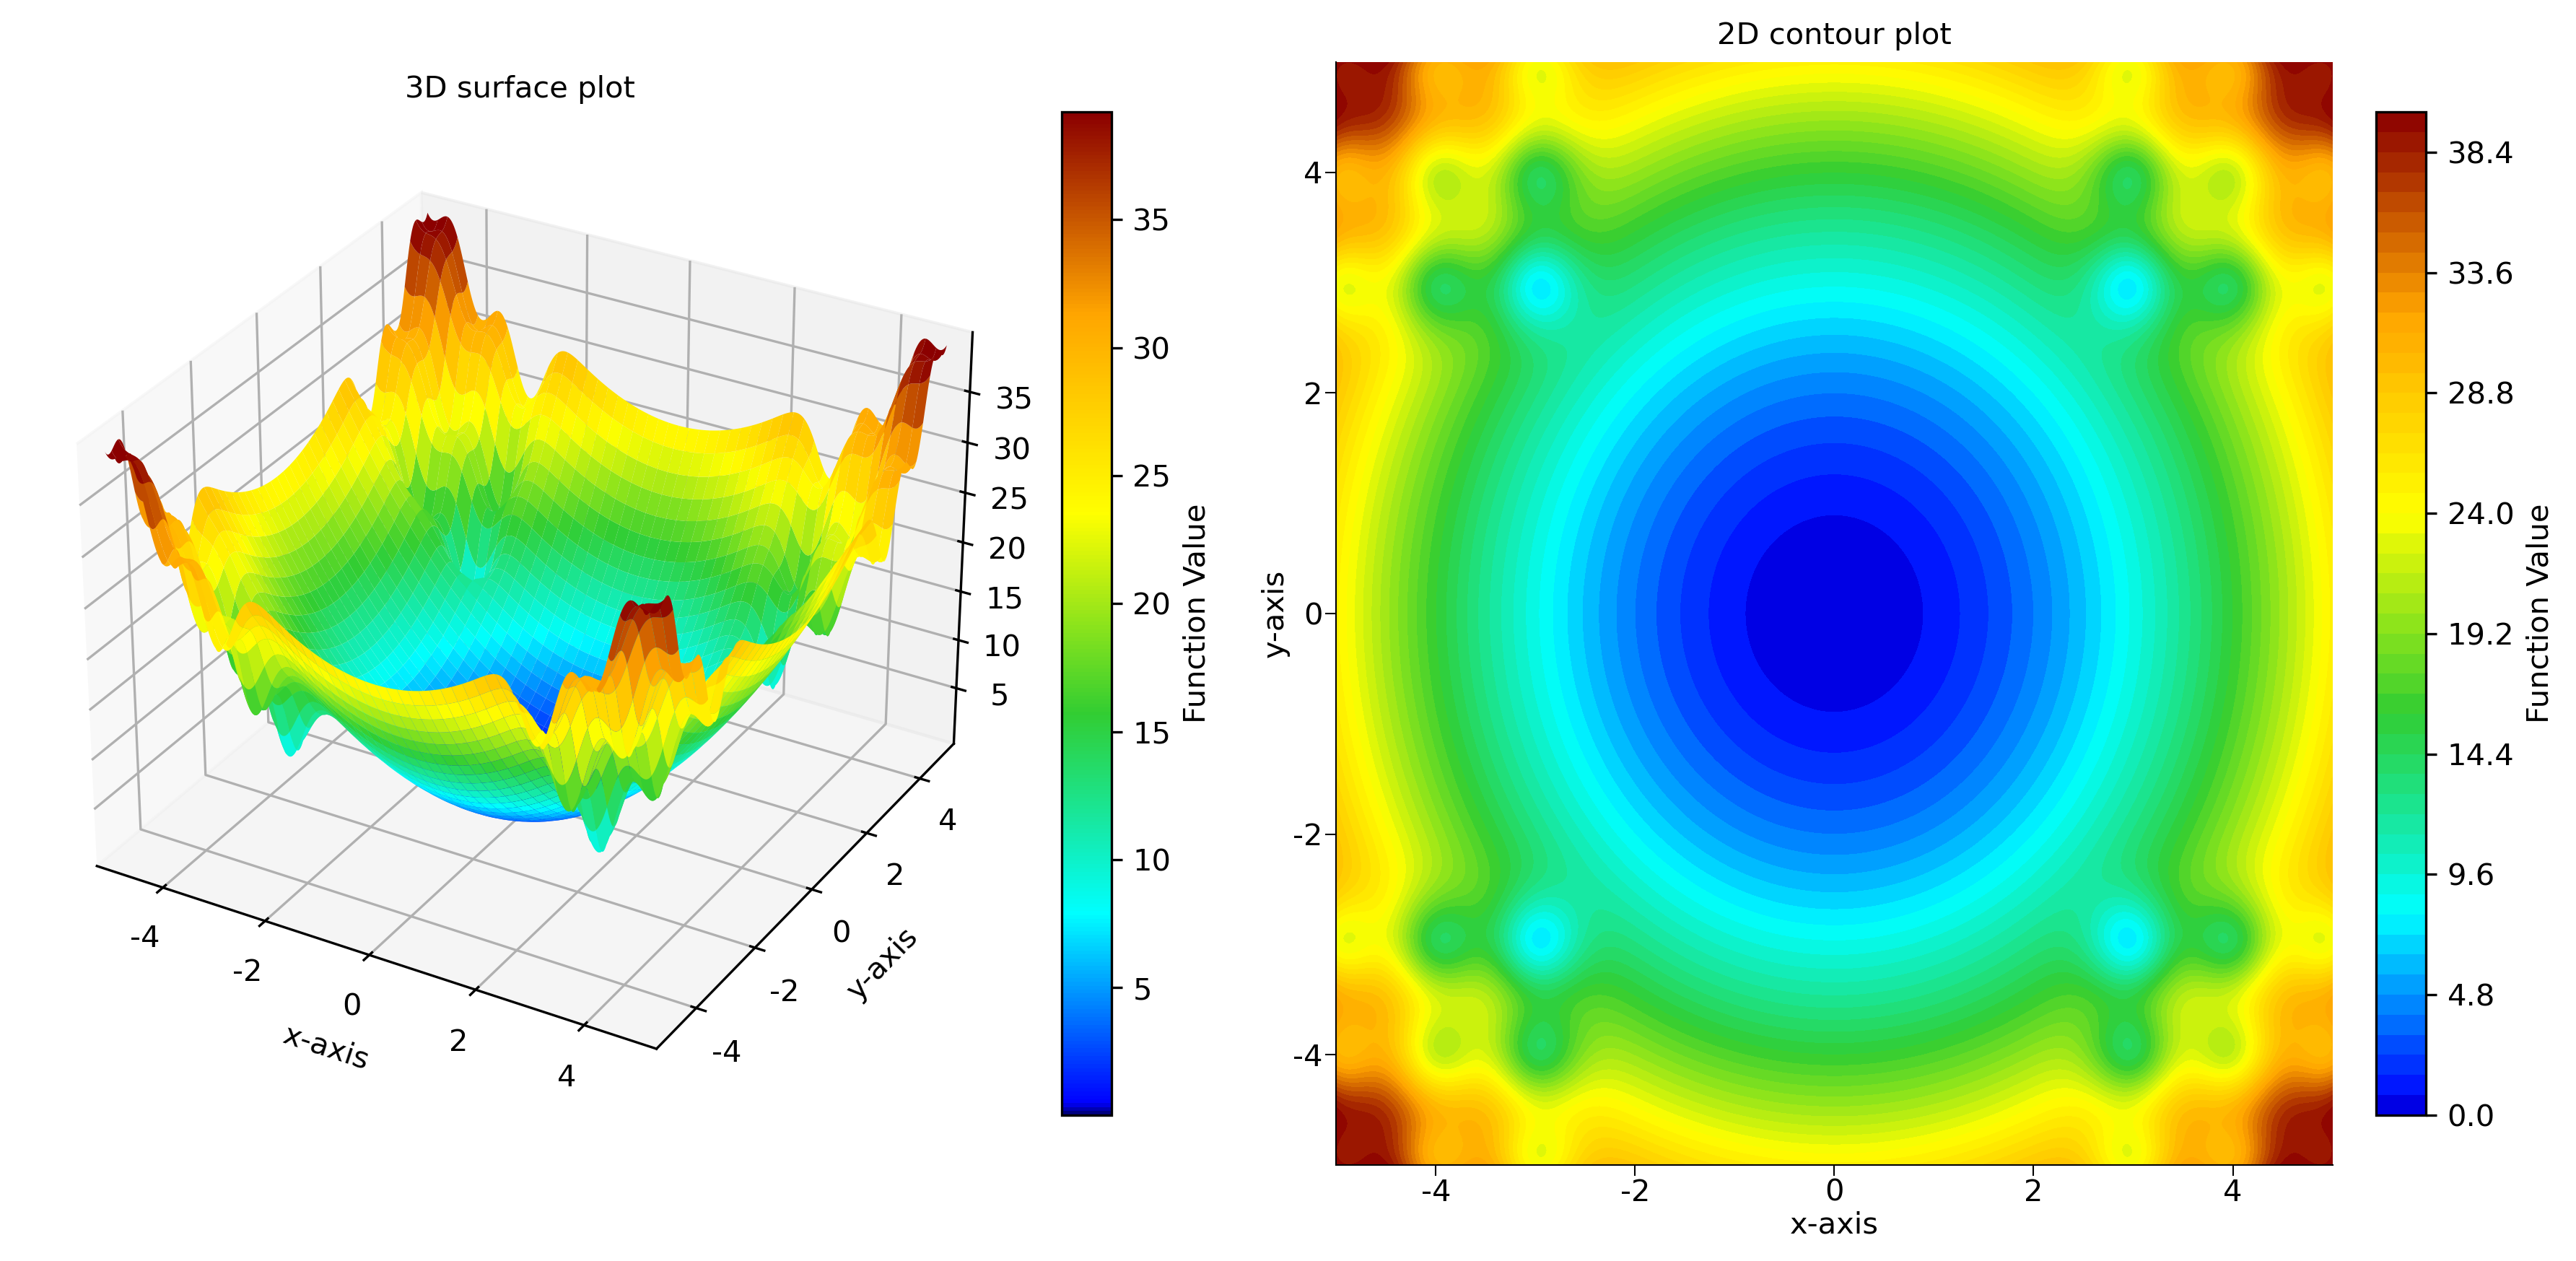

In [67]:
fig = plt.figure(figsize=(12, 6), dpi=300)
fig, ax1, ax2 = plot_graph(fig, x, y, z)

ax1.set_ylabel("y-axis", labelpad=1)
ax1.set_xlabel("x-axis", labelpad=1)
ax1.set_title("3D surface plot", fontsize=10)
ax1 = utility.custom_figure_axis(ax=ax1, show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 10)

ax2.set_ylabel("y-axis", labelpad=1)
ax2.set_xlabel("x-axis", labelpad=1)
ax2.set_title("2D contour plot", fontsize=10)
ax2 = utility.custom_figure_axis(ax=ax2, show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 10)
ax1.grid()
# plt.savefig("sample3.png", dpi = 300)
plt.savefig("sample3.pdf", dpi = 300, transparent=False, bbox_inches="tight")

##### Show a dummy example

In [8]:
args = [-0.16210637, -0.11185439]

grad = obj.compute_gradient(args = args, f = f)
print("Gradient:", grad)

Gradient: [-0.32421274 -0.22370878]


##### Define parametrs and variables

In [9]:
num_samples=5000
dimension=2
batch_size=512

##### Generate synthetic data to model the gradient of function with min and max grid

In [10]:
X_train, X_test, y_train, y_test = obj.generate_random_data(f=f, num_samples=num_samples, dimension=dimension, value_range=(min_grid,max_grid))

##### Define model architecture

In [11]:
model = Sequential([
    Dense(16, input_shape=(dimension,), activation='leaky_relu'),
    Dense(8, activation='leaky_relu', kernel_regularizer=l2(0.001)),
    # Dense(8, activation='leaky_relu'),
    Dense(dimension)
])


model.compile(loss='mae', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

epochs = 200

history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1)

2025-03-05 17:19:55.340372: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/200
7/7 [==============================] - 1s 38ms/step - loss: 5.1710 - val_loss: 5.1953
Epoch 2/200
7/7 [==============================] - 0s 12ms/step - loss: 5.0893 - val_loss: 5.1149
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 5.0091 - val_loss: 5.0352
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 4.9287 - val_loss: 4.9571
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 4.8504 - val_loss: 4.8767
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 4.7687 - val_loss: 4.7932
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 4.6840 - val_loss: 4.7088
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 4.5974 - val_loss: 4.6239
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 4.5088 - val_loss: 4.5384
Epoch 10/200
7/7 [==============================] - 0s 8ms/step - loss: 4.4191 - val_loss: 4.4532
Epoch 11/200
7/7 [===

##### Define loss curve

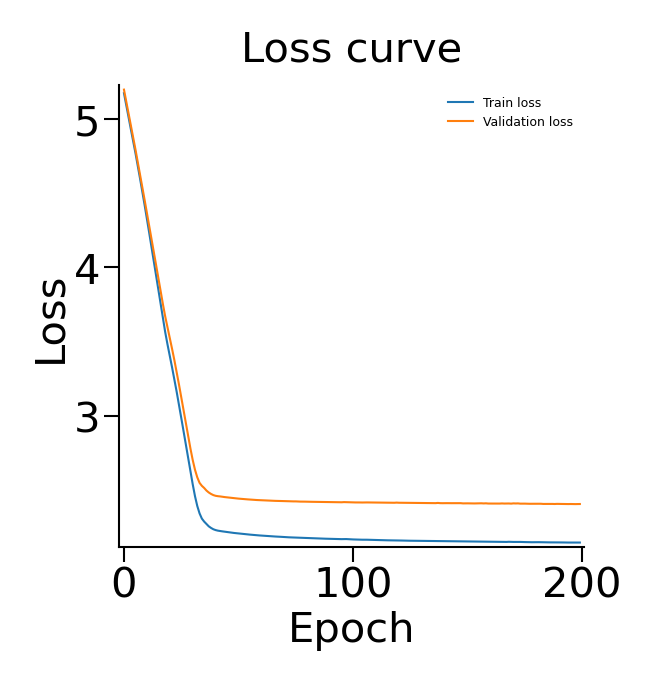

In [71]:
ax = obj.plot_convergence(history)
# ax = utility.custom_figure_axis(ax, fontsize=4, rotation = 0)
ax.set_ylabel("Loss", labelpad=1)
ax.set_xlabel("Epoch", labelpad=1)
ax.set_title("Loss curve", fontsize=10)

ax = utility.custom_figure_axis(ax, show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 10)

# plt.savefig("loss3.pdf", dpi = 300, transparent=False, bbox_inches="tight")

##### Test data performance

In [13]:
test_loss = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)

32/32 [==============================] - 0s 2ms/step - loss: 2.2530
Test loss: 2.252950668334961


##### Define torch optimizer

In [14]:
def torch_optimization(args, lr, num_steps, f):
    import torch
    import torch.optim as optim
    x = torch.tensor(args[0], dtype=torch.float32, requires_grad=True)
    y = torch.tensor(args[1], dtype=torch.float32, requires_grad=True)

    optimizer = optim.Adam([x, y], lr=lr)

    for step in range(num_steps):
        optimizer.zero_grad()
        
        loss = f((x, y))
        
        loss.backward()
        
        optimizer.step()
    return np.array([x.item(), y.item()])


##### Run 1000 iteration to optimize funtion from [-5,5] with step size of 1 with various method

In [20]:
max_iters = 1000
c = 0
lr = 0.001
dct = dict()

df = pd.DataFrame(columns =["X_start",  "y_start", "X_gd", "y_gd", "X_new", "y_new", "X_autograd", "y_autograd"])

for i in list(range(-5, 6, 1)):
    for j in list(range(-5, 6, 1)):

        print(f"currently running for x = {i} and y = {j}")
        x0 = np.array([i*1.0, j*1.0])
        x_gd, X_new, y_gd, y_new, current_score_new, current_score_gd = obj.optimize_function(f=f, model = model, x0=x0, learning_rate=lr, max_iters=max_iters, tol=1e-5)
        df.loc[c, ["X_gd", "X_new", "y_gd", "y_new"]] = x_gd, X_new, y_gd, y_new
        df.loc[c, "y_start"] = f(x0)
        df.loc[c, "X_start"] = x0


        x_torch = torch_optimization(args=x0, lr = lr, num_steps=max_iters, f=parabolic_loss_with_dips_3D_torch)

        df.loc[c, "X_autograd"] = x_torch
        df.loc[c, "y_autograd"] = f(x_torch)

        dct[(i, j)] = dict()


        dct[(i, j)] =   {"x_gd" : x_gd, "X_new": X_new, "y_gd": y_gd, "current_score_new": current_score_new, "current_score_gd":current_score_gd, "X_autograd":x_torch, "y_autograd": f(x_torch)}

        c = c + 1

        x0, x_gd, X_new, y_gd, y_new, current_score_new, current_score_gd, x_torch = [None] * 8

    #     break
    # break







currently running for x = -5 and y = -5
currently running for x = -5 and y = -4
currently running for x = -5 and y = -3
currently running for x = -5 and y = -2
currently running for x = -5 and y = -1
currently running for x = -5 and y = 0
currently running for x = -5 and y = 1
currently running for x = -5 and y = 2
currently running for x = -5 and y = 3
currently running for x = -5 and y = 4
currently running for x = -5 and y = 5
currently running for x = -4 and y = -5
currently running for x = -4 and y = -4
currently running for x = -4 and y = -3
currently running for x = -4 and y = -2
currently running for x = -4 and y = -1
currently running for x = -4 and y = 0
currently running for x = -4 and y = 1
currently running for x = -4 and y = 2
currently running for x = -4 and y = 3
currently running for x = -4 and y = 4
currently running for x = -4 and y = 5
currently running for x = -3 and y = -5
currently running for x = -3 and y = -4
currently running for x = -3 and y = -3
currently ru

##### Show result

In [21]:
df

,X_start,y_start,X_gd,y_gd,X_new,y_new,X_autograd,y_autograd
0,"[-5.0, -5.0]",39.864787,"[-4.862640923335633, -4.862640923335633]",38.563417,"[-0.8163965441053733, -0.831724778865464]",1.358269,"[-4.862649440765381, -4.862649440765381]",38.563417
1,"[-5.0, -4.0]",30.796954,"[-4.868872600323932, -3.898769708206814]",29.782902,"[-0.7675879143644124, -0.6795353324851021]",1.050959,"[-4.868879318237305, -3.8987724781036377]",29.782902
2,"[-5.0, -3.0]",23.864787,"[-4.871450589992783, -2.940466071703149]",23.077296,"[-0.7032987182028592, -0.4698862656368874]",0.715422,"[-4.871456623077393, -2.940467119216919]",23.077296
3,"[-5.0, -2.0]",28.932167,"[-0.675483071675288, -0.27249337980498156]",0.53053,"[-0.6627869493095204, -0.2828365703462623]",0.519283,"[-4.044398784637451, -1.0948091745376587]",17.555769
4,"[-5.0, -1.0]",26.0,"[-0.675322612279029, -0.13506452378790523]",0.474303,"[-0.6611120906891301, -0.13916209863964468]",0.456435,"[-4.044723987579346, -0.25766611099243164]",16.426184
...,...,...,...,...,...,...,...,...
116,"[5.0, 1.0]",26.0,"[0.675322612279029, 0.13506452378790523]",0.474303,"[0.6538998205214739, 0.12317094273748808]",0.442756,"[4.044723987579346, 0.25766611099243164]",16.426184
117,"[5.0, 2.0]",28.932167,"[0.6754830716754878, 0.2724933798050204]",0.53053,"[0.6602672460721806, 0.2689696573652327]",0.508298,"[4.044398784637451, 1.0948091745376587]",17.555769
118,"[5.0, 3.0]",23.864787,"[4.871450589993138, 2.940466071704215]",23.077296,"[0.6638426481513306, 0.4172329586581327]",0.61477,"[4.871456623077393, 2.940467119216919]",23.077296
119,"[5.0, 4.0]",30.796954,"[4.868872600324643, 3.898769708206281]",29.782902,"[0.6674256490077823, 0.5654878491768613]",0.765234,"[4.868879318237305, 3.8987724781036377]",29.782902


In [ ]:
# # Load the saved model
# model.save("sample3_model.keras")
# loaded_model = load_model("sample3_model.keras") 
# # test_loss = loaded_model.evaluate(X_test, y_test)
# # print("Test loss:", loaded_model.evaluate(X_test, y_test))

#### pickle result

In [72]:
res = {"model": model, "history": history, "result": df, "dct": dct}

# Save (pickle) the dictionary to a file
with open("pickle3.pkl", "wb") as file:
    pickle.dump(res, file)

In [73]:
# Load (unpickle) the dictionary from the file
with open("pickle3.pkl", "rb") as file:
    loaded_data = pickle.load(file)

# print(loaded_data)


##### Test if pickled model is working

In [74]:
loaded_model1 = loaded_data["model"]
# test_loss = loaded_model.evaluate(X_test, y_test)
print("Test loss:", loaded_model1.evaluate(X_test, y_test))

32/32 [==============================] - 0s 1ms/step - loss: 2.2530
Test loss: 2.252950668334961


##### Density plot of optimized y (left) and optimized y with various method with various starting point (right)

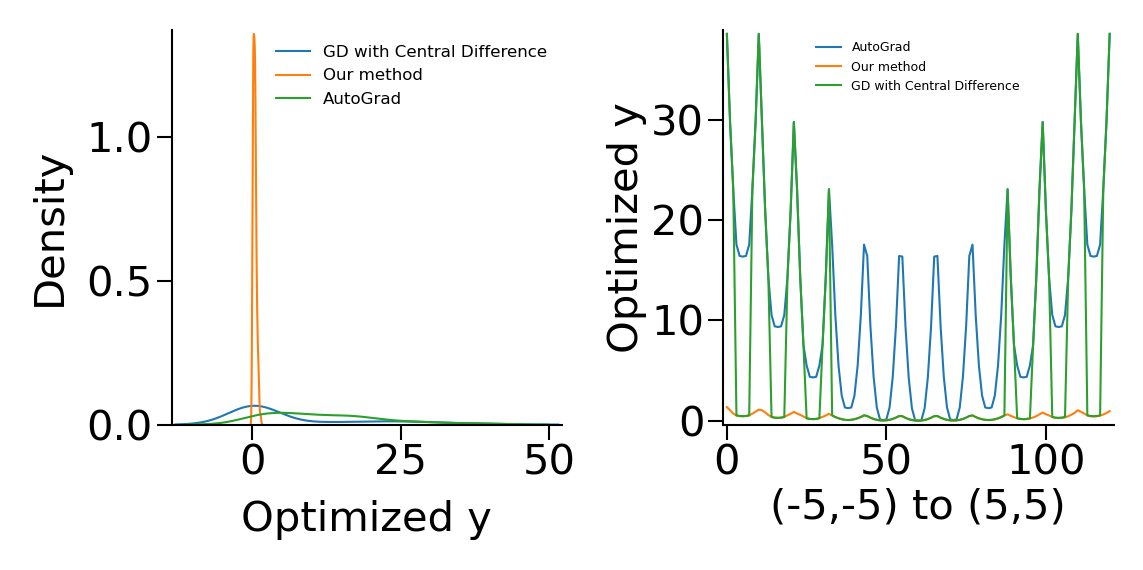

In [ ]:
fig, ax = plt.subplots(1, 2, dpi = 300, figsize = (4,2))
fig.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02)
import seaborn as sns
ax[0] = sns.kdeplot(data = df, x = "y_gd", ax=ax[0], label = "GD with Central Difference", lw = 0.5)
ax[0] = sns.kdeplot(data = df, x = "y_new", ax=ax[0], label = "Our method", lw = 0.5)
ax[0] = sns.kdeplot(data = df, x = "y_autograd", ax=ax[0], label = "AutoGrad", lw = 0.5)
ax[0].legend(ncol = 1, fontsize=4, frameon=False)
ax[0].set_xlabel("Optimized y")

# ax[0] = utility.custom_figure_axis(ax[0], rotation=0, fontsize=5)
# 
ax[0] = utility.custom_figure_axis(ax[0], show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 3)


ax[1] = sns.lineplot(data = df, x = range(df.shape[0]), y = "y_autograd", ax=ax[1], label = "AutoGrad", lw = 0.5)
ax[1] = sns.lineplot(data = df, x = range(df.shape[0]), y = "y_new", ax=ax[1], label = "Our method", lw = 0.5)
ax[1] = sns.lineplot(data = df, x = range(df.shape[0]), y = "y_gd", ax=ax[1], label = "GD with Central Difference", lw = 0.5)

ax[1] = utility.custom_figure_axis(ax[1], show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 3)


ax[1].legend(ncol = 1, fontsize=3, frameon=False)
ax[1].set_ylabel("Optimized y", labelpad=1)
ax[1].set_xlabel("(-5,-5) to (5,5)", labelpad=1)



plt.tight_layout()
# plt.savefig("tt4_multi.pdf", dpi = 300, transparent=False, bbox_inches="tight")

In [27]:
# df.to_csv("tt3d.csv", index=False)

In [79]:
df

,X_start,y_start,X_gd,y_gd,X_new,y_new,X_autograd,y_autograd
0,"[-5.0, -5.0]",39.864787,"[-4.862640923335633, -4.862640923335633]",38.563417,"[-0.8163965441053733, -0.831724778865464]",1.358269,"[-4.862649440765381, -4.862649440765381]",38.563417
1,"[-5.0, -4.0]",30.796954,"[-4.868872600323932, -3.898769708206814]",29.782902,"[-0.7675879143644124, -0.6795353324851021]",1.050959,"[-4.868879318237305, -3.8987724781036377]",29.782902
2,"[-5.0, -3.0]",23.864787,"[-4.871450589992783, -2.940466071703149]",23.077296,"[-0.7032987182028592, -0.4698862656368874]",0.715422,"[-4.871456623077393, -2.940467119216919]",23.077296
3,"[-5.0, -2.0]",28.932167,"[-0.675483071675288, -0.27249337980498156]",0.53053,"[-0.6627869493095204, -0.2828365703462623]",0.519283,"[-4.044398784637451, -1.0948091745376587]",17.555769
4,"[-5.0, -1.0]",26.0,"[-0.675322612279029, -0.13506452378790523]",0.474303,"[-0.6611120906891301, -0.13916209863964468]",0.456435,"[-4.044723987579346, -0.25766611099243164]",16.426184
...,...,...,...,...,...,...,...,...
116,"[5.0, 1.0]",26.0,"[0.675322612279029, 0.13506452378790523]",0.474303,"[0.6538998205214739, 0.12317094273748808]",0.442756,"[4.044723987579346, 0.25766611099243164]",16.426184
117,"[5.0, 2.0]",28.932167,"[0.6754830716754878, 0.2724933798050204]",0.53053,"[0.6602672460721806, 0.2689696573652327]",0.508298,"[4.044398784637451, 1.0948091745376587]",17.555769
118,"[5.0, 3.0]",23.864787,"[4.871450589993138, 2.940466071704215]",23.077296,"[0.6638426481513306, 0.4172329586581327]",0.61477,"[4.871456623077393, 2.940467119216919]",23.077296
119,"[5.0, 4.0]",30.796954,"[4.868872600324643, 3.898769708206281]",29.782902,"[0.6674256490077823, 0.5654878491768613]",0.765234,"[4.868879318237305, 3.8987724781036377]",29.782902


In [83]:
import numpy as np

def compute_error_metrics(series):
    """
    Compute various error metrics with respect to zero.

    Parameters:
    series (array-like): List or NumPy array of numerical values.

    Returns:
    dict: Dictionary containing various error metrics.
    """
    series = np.array(series)

    metrics = {
        "Mean Absolute Error (MAE)": np.mean(np.abs(series)),
        "Root Mean Square Error (RMSE)": np.sqrt(np.mean(series ** 2)),
        # "Mean Squared Error (MSE)": np.mean(series ** 2),
        # "Median Absolute Deviation (MAD)": np.median(np.abs(series)),
        # "Maximum Absolute Error (MaxAE)": np.max(np.abs(series))
    }
    
    return metrics



##### Distance from global minimum at 0 for proposed methoed

In [86]:
# Example usage
error_metrics = compute_error_metrics(df["y_new"])

# Print the results
for metric, value in error_metrics.items():
    print(f"The {metric} distance from global minimum at 0: {value:.3f}")


The Mean Absolute Error (MAE) distance from global minimum at 0: 0.388
The Root Mean Square Error (RMSE) distance from global minimum at 0: 0.477


##### Distance from global minimum at 0 for autograd method

In [87]:
# Example usage
error_metrics = compute_error_metrics(df["y_autograd"])


# Print the results
for metric, value in error_metrics.items():
    print(f"The {metric} distance from global minimum at 0: {value:.3f}")


The Mean Absolute Error (MAE) distance from global minimum at 0: 12.088
The Root Mean Square Error (RMSE) distance from global minimum at 0: 15.504


##### Distance from global minimum at 0 for central difference with gradient descent

In [88]:
# Example usage
error_metrics = compute_error_metrics(df["y_gd"])


# Print the results
for metric, value in error_metrics.items():
    print(f"The {metric} distance from global minimum at 0: {value:.3f}")


The Mean Absolute Error (MAE) distance from global minimum at 0: 6.842
The Root Mean Square Error (RMSE) distance from global minimum at 0: 13.154
